In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, AveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
def load_images(image_names, directory):
    images = []
    for img_name in image_names:
        img = load_img(f"{directory}/{img_name}", target_size=(224, 224))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [90]:
train_directory = 'C:\\Users\\897618\\OneDrive - hull.ac.uk\\AI&DS MSc\\AI Final Assingnment#\\train\\'
x_train = load_images(train_df['image_names'], train_directory)
x_train = np.array(x_train)
y_train = np.array(train_df['emergency_or_not'])

Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\1503.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\1420.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\1764.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\1356.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\1117.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\45.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\2313.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\1657.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\AI&DS MSc\AI Final Assingnment#\train\294.jpg
Attempting to load: C:\Users\897618\OneDrive - hull.ac.uk\

In [91]:
x_test = load_images(test_df['image_names'], 'C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test')
x_test = np.array(x_test)

Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\1960.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\668.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\2082.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\808.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\1907.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\350.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\1557.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\111.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/AI Final Assingnment#/test\1952.jpg
Attempting to load: C:/Users/897618/OneDrive - hull.ac.uk/AI&DS MSc/

# Data Pre-Processing and Data Augmentation

In [92]:
x_train.shape, x_test.shape, y_train.shape,

((1646, 224, 224, 3), (706, 224, 224, 3), (1646,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


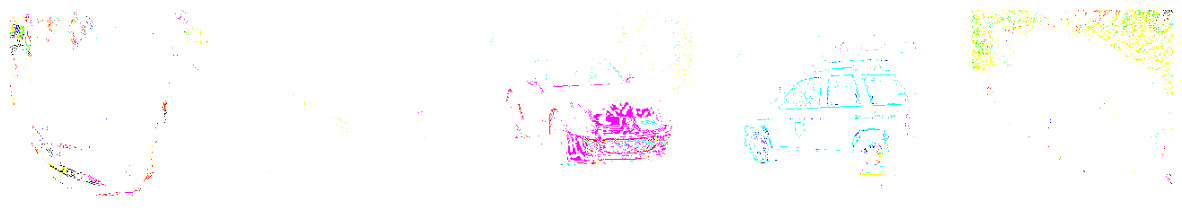

In [93]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()

In [94]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [95]:
train_datagen = ImageDataGenerator(rotation_range=20,         #Randomly rotates images up to 10 degrees
                                   width_shift_range=0.1,     #Randomly shift images horizontally up to 10% of the width
                                   height_shift_range=0.1,    #Randomly shift images vertically up to 10% of the height
                                   horizontal_flip=True,      #Randomly flip images horizontally
                                   vertical_flip=False,       #Don't randomly flip images vertically
                                   shear_range=0.10,          #Crops part of the image
                                   zoom_range=0.10)           #Zooms the image by 10%

In [96]:
train_datagen.fit(x_train)

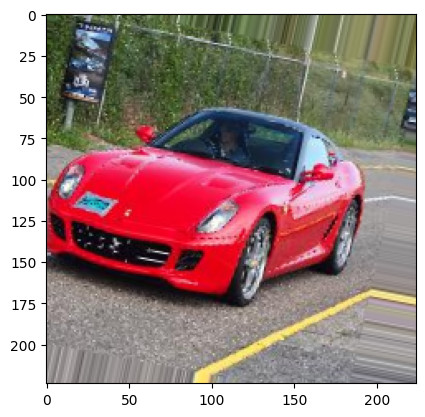

In [97]:
plt.imshow(train_datagen.random_transform(x_train[2]))

# Image Classification with a CNN Model

In [98]:
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Binary classification (emergency or not)
])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │      22,151,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,244,545 (84.86 MB)

 Trainable params: 22,244,545 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
from sklearn.model_selection import train_test_split

# Split training data into train and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Use the augmented data and train the model
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=32), 
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.5241 - loss: 0.6993 - val_accuracy: 0.6000 - val_loss: 0.6670
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.5825 - loss: 0.6769 - val_accuracy: 0.6848 - val_loss: 0.6155
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.6385 - loss: 0.6373 - val_accuracy: 0.6818 - val_loss: 0.5748
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.7058 - loss: 0.6018 - val_accuracy: 0.7000 - val_loss: 0.5698
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.7267 - loss: 0.5525 - val_accuracy: 0.7030 - val_loss: 0.5979
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.6839 - loss: 0.5915 - val_accuracy: 0.7182 - val_loss: 0.5479
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.7251 - loss: 0.5488 - val_accuracy: 0.7273 - val_loss: 0.5311
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.7426 - loss: 0.5724 - val_accuracy: 0.730

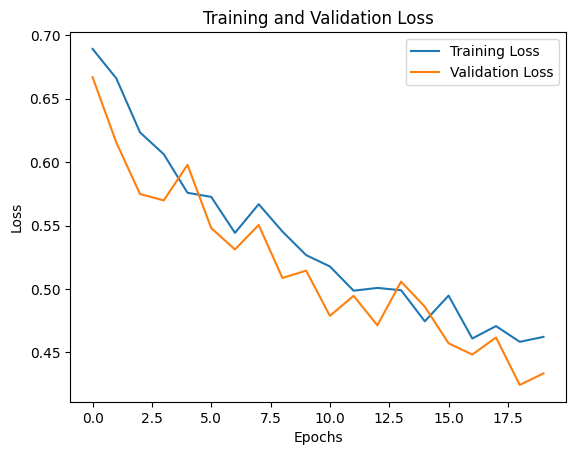

In [101]:
history_df = pd.DataFrame(history.history)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

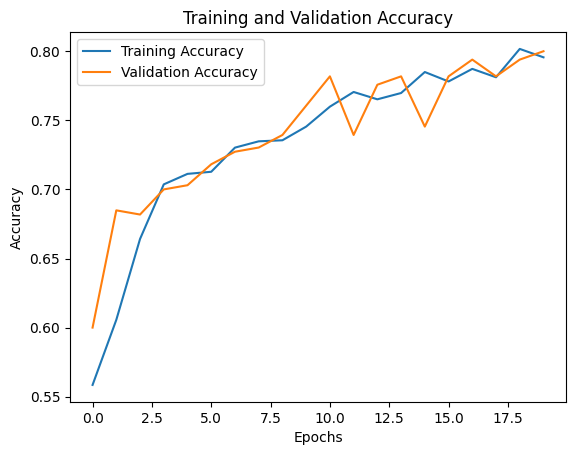

In [102]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
# evaluate the model's performance,

In [104]:
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       198
           1       0.75      0.76      0.75       132

    accuracy                           0.80       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.80      0.80      0.80       330



<Figure size 2000x3000 with 0 Axes>

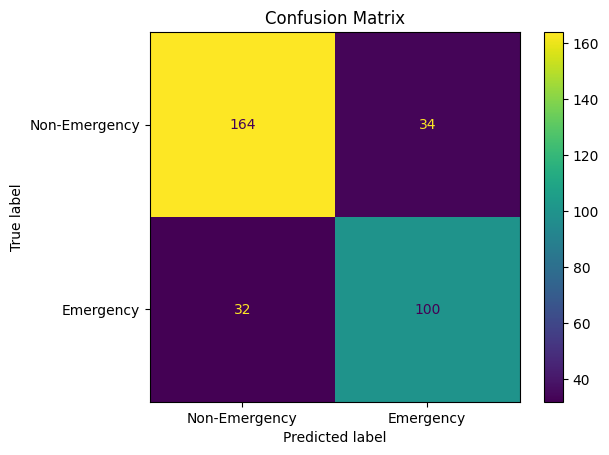

In [105]:
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

# with 3 Dense layers

In [106]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │      22,151,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,286,081 (85.01 MB)

 Trainable params: 22,286,081 (85.01 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [108]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [109]:
# Use the augmented data and train the model
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=32), 
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.5852 - loss: 0.6866 - val_accuracy: 0.6394 - val_loss: 0.6426
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.6195 - loss: 0.6654 - val_accuracy: 0.6909 - val_loss: 0.6378
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 0.6752 - loss: 0.6342 - val_accuracy: 0.7091 - val_loss: 0.5926
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.6925 - loss: 0.6028 - val_accuracy: 0.7182 - val_loss: 0.5636
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 266ms/step - accuracy: 0.7566 - loss: 0.5452 - val_accuracy: 0.7121 - val_loss: 0.6084
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.7281 - loss: 0.5870 - val_accuracy: 0.7606 - val_loss: 0.5233
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 265ms/step - accuracy: 0.7572 - loss: 0.5352 - val_accuracy: 0.7545 - val_loss: 0.4886
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.7454 - loss: 0.5275 - val_accuracy: 0.733

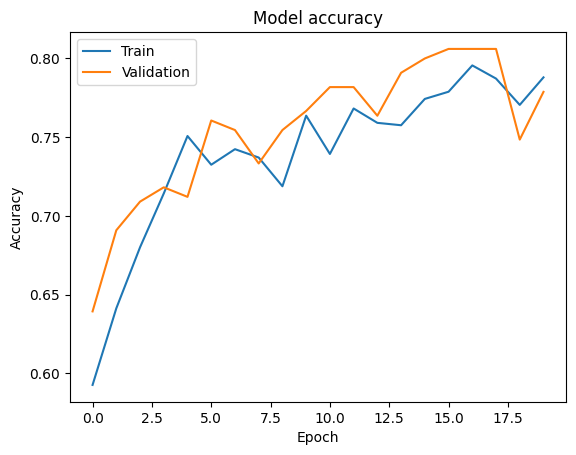

In [110]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

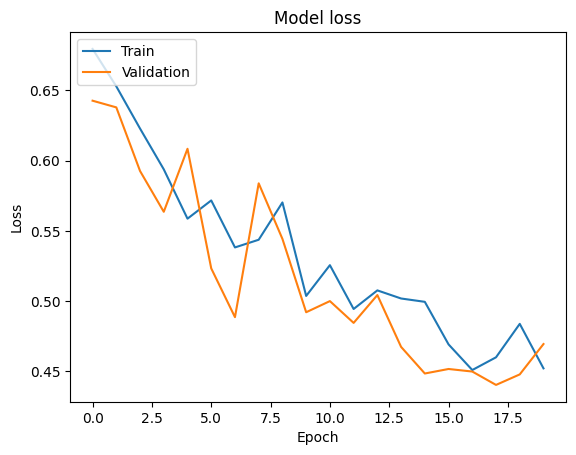

In [111]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [112]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       198
           1       0.73      0.71      0.72       132

    accuracy                           0.78       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.78      0.78      0.78       330



In [113]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
# Predict the labels on the test set
y_pred = model.predict(x_val_split)
y_pred_class = (y_val_pred > 0.5).astype(int)  # Convert predictions to 0 or 1

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


<Figure size 2000x3000 with 0 Axes>

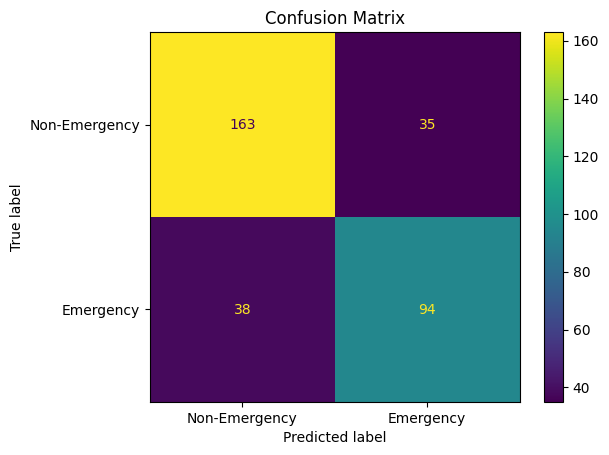

In [114]:
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning

In [115]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │      22,151,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,286,081 (85.01 MB)

 Trainable params: 22,286,081 (85.01 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=64),  # with Batch size = 64
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)


Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.4749 - loss: 0.6938 - val_accuracy: 0.6000 - val_loss: 0.6744
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 478ms/step - accuracy: 0.5743 - loss: 0.6783 - val_accuracy: 0.6000 - val_loss: 0.6621
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 510ms/step - accuracy: 0.5749 - loss: 0.6729 - val_accuracy: 0.6455 - val_loss: 0.6415
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 507ms/step - accuracy: 0.6385 - loss: 0.6465 - val_accuracy: 0.6879 - val_loss: 0.6058
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 506ms/step - accuracy: 0.6623 - loss: 0.6299 - val_accuracy: 0.7030 - val_loss: 0.6450
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 517ms/step - accuracy: 0.6827 - loss: 0.6363 - val_accuracy: 0.7000 - val_loss: 0.5826
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 512ms/step - accuracy: 0.7228 - loss: 0.5569 - val_accuracy: 0.7364 - val_loss: 0.5644
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 509ms/step - accuracy: 0.7221 - loss: 0.5679 - val_accuracy: 0.718

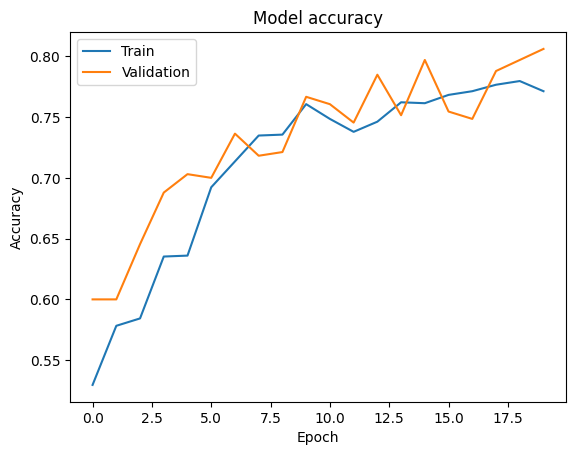

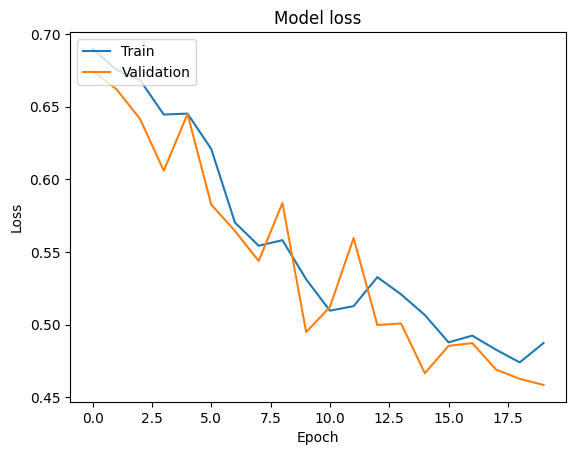

In [117]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [118]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       198
           1       0.73      0.81      0.77       132

    accuracy                           0.81       330
   macro avg       0.80      0.81      0.80       330
weighted avg       0.81      0.81      0.81       330



<Figure size 2000x3000 with 0 Axes>

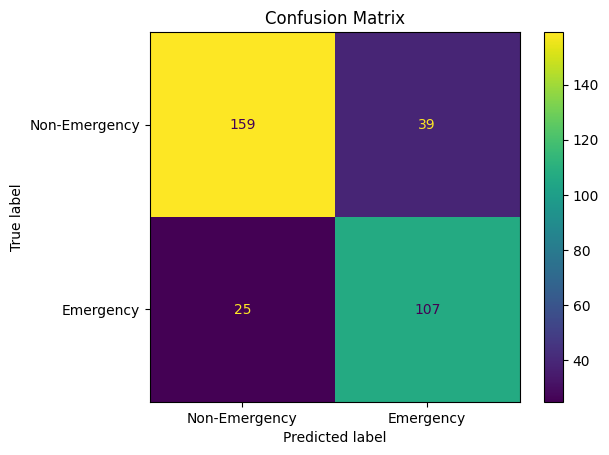

In [119]:
# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [120]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 346112)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │      22,151,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,286,081 (85.01 MB)

 Trainable params: 22,286,081 (85.01 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=128),  # with Batch size = 128
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 792ms/step - accuracy: 0.5832 - loss: 0.6905 - val_accuracy: 0.6000 - val_loss: 0.6782
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 828ms/step - accuracy: 0.5720 - loss: 0.6828 - val_accuracy: 0.6000 - val_loss: 0.6670
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 878ms/step - accuracy: 0.5855 - loss: 0.6703 - val_accuracy: 0.6000 - val_loss: 0.6586
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 854ms/step - accuracy: 0.5932 - loss: 0.6693 - val_accuracy: 0.6515 - val_loss: 0.6519
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 867ms/step - accuracy: 0.6180 - loss: 0.6686 - val_accuracy: 0.6727 - val_loss: 0.6390
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 931ms/step - accuracy: 0.6472 - loss: 0.6408 - val_accuracy: 0.6606 - val_loss: 0.6368
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 876ms/step - accuracy: 0.6531 - loss: 0.6362 - val_accuracy: 0.6848 - val_loss: 0.6091
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 857ms/step - accuracy: 0.6662 - loss: 0.6304 - val_accuracy: 0.700

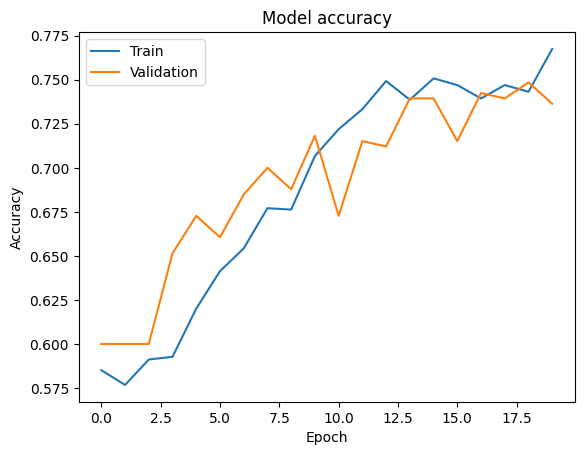

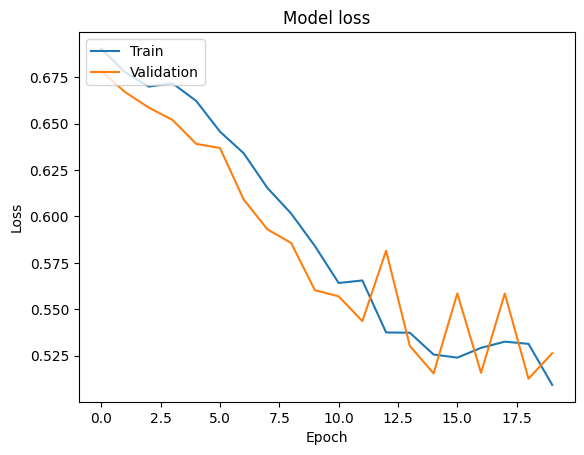

In [122]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       198
           1       0.66      0.70      0.68       132

    accuracy                           0.74       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.74      0.74      0.74       330



<Figure size 2000x3000 with 0 Axes>

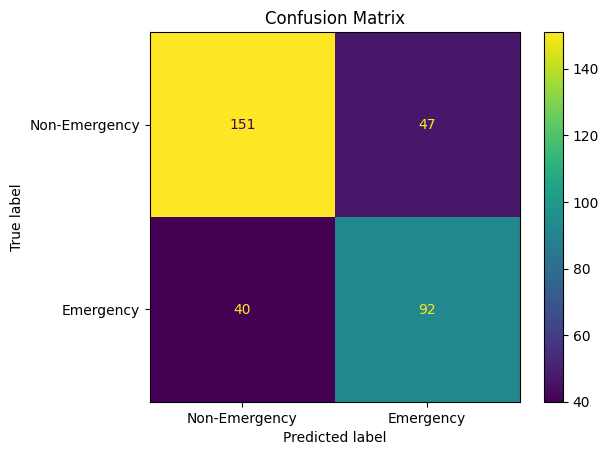

In [123]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [124]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,985 (1.01 MB)

 Trainable params: 265,985 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 128
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=128),  # with Batch size = 128
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.7740 - loss: 0.4929 - val_accuracy: 0.7333 - val_loss: 0.5285
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.7805 - loss: 0.4862 - val_accuracy: 0.7273 - val_loss: 0.5552
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.7538 - loss: 0.5175 - val_accuracy: 0.7333 - val_loss: 0.5247
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.7733 - loss: 0.5103 - val_accuracy: 0.7394 - val_loss: 0.5387
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.7599 - loss: 0.5032 - val_accuracy: 0.7333 - val_loss: 0.5163
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.7701 - loss: 0.5055 - val_accuracy: 0.7212 - val_loss: 0.5286
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.7569 - loss: 0.5093 - val_accuracy: 0.7455 - val_loss: 0.5346
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.7702 - loss: 0.5291 - val_accuracy: 0.

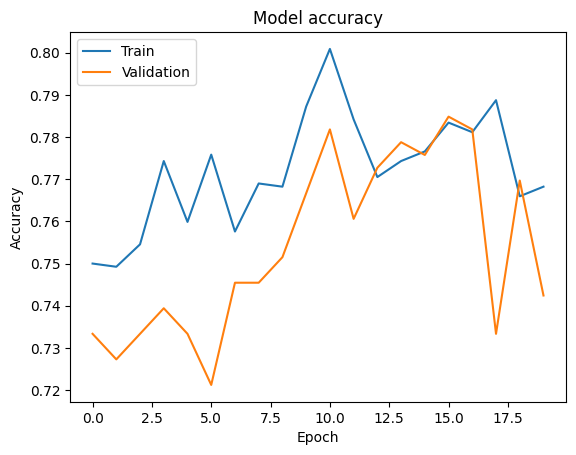

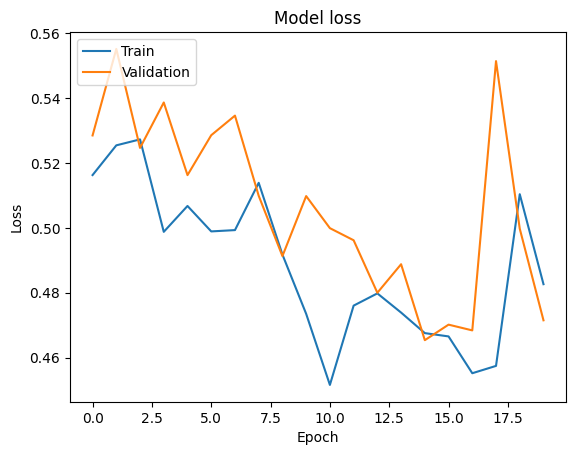

In [131]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       198
           1       0.72      0.58      0.64       132

    accuracy                           0.74       330
   macro avg       0.74      0.71      0.72       330
weighted avg       0.74      0.74      0.74       330



<Figure size 2000x3000 with 0 Axes>

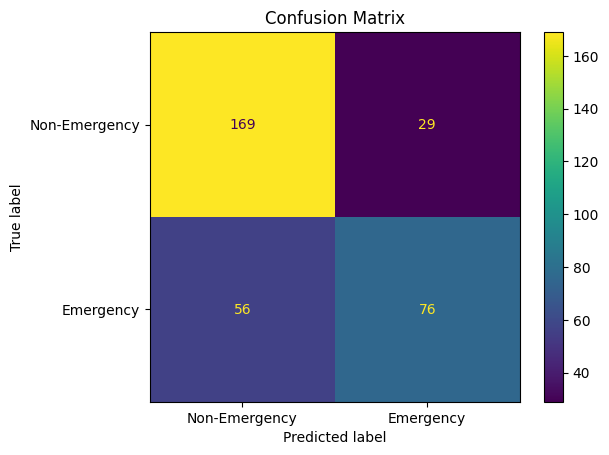

In [132]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [133]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 112, 112, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431,361 (1.65 MB)

 Trainable params: 431,361 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=128),  # with Batch size = 128
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.4803 - loss: 0.6939 - val_accuracy: 0.6000 - val_loss: 0.6866
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.6018 - loss: 0.6841 - val_accuracy: 0.6000 - val_loss: 0.6763
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.5824 - loss: 0.6801 - val_accuracy: 0.6000 - val_loss: 0.6735
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.5696 - loss: 0.6829 - val_accuracy: 0.6000 - val_loss: 0.6726
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.5994 - loss: 0.6727 - val_accuracy: 0.6000 - val_loss: 0.6709
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.5739 - loss: 0.6786 - val_accuracy: 0.6000 - val_loss: 0.6703
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.5785 - loss: 0.6747 - val_accuracy: 0.6000 - val_loss: 0.6673
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.5900 - loss: 0.6693 - val_accuracy: 0.6000 - val_

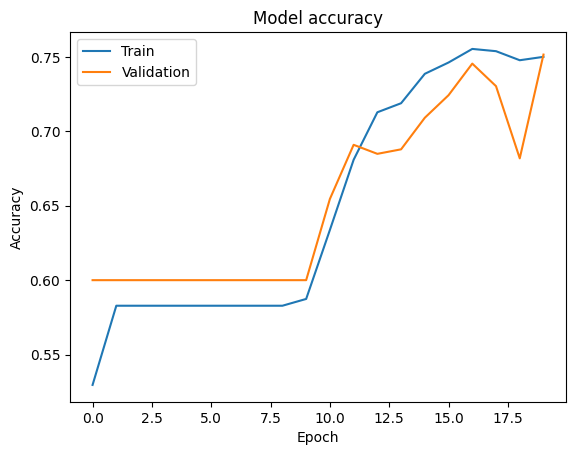

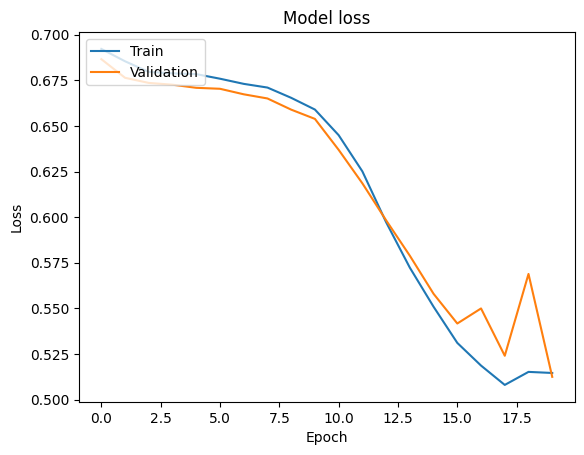

In [135]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       198
           1       0.72      0.62      0.67       132

    accuracy                           0.75       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.75      0.75      0.75       330



<Figure size 2000x3000 with 0 Axes>

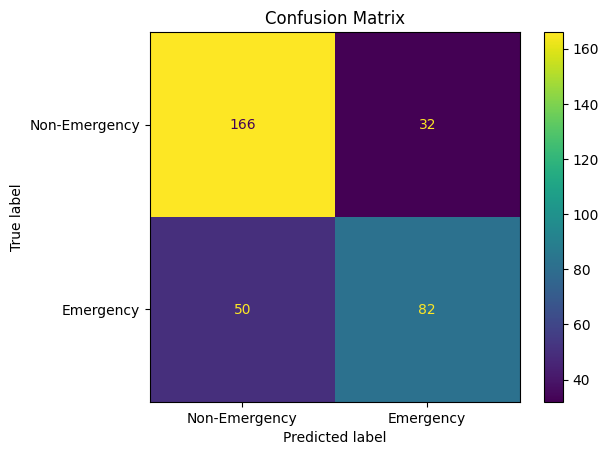

In [136]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [137]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 112, 112, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 56, 56, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 432,257 (1.65 MB)

 Trainable params: 431,809 (1.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [138]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=128),  # with Batch size = 128
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.5487 - loss: 0.7002 - val_accuracy: 0.6000 - val_loss: 0.6693
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.6262 - loss: 0.6472 - val_accuracy: 0.6182 - val_loss: 0.6281
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.7123 - loss: 0.5680 - val_accuracy: 0.7333 - val_loss: 0.5469
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.7522 - loss: 0.5163 - val_accuracy: 0.7242 - val_loss: 0.6075
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.7560 - loss: 0.5185 - val_accuracy: 0.7364 - val_loss: 0.5017
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.7651 - loss: 0.4737 - val_accuracy: 0.7576 - val_loss: 0.5340
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.7773 - loss: 0.4747 - val_accuracy: 0.7364 - val_loss: 0.5407
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.8102 - loss: 0.4158 - val_accuracy: 0.7697 - val_

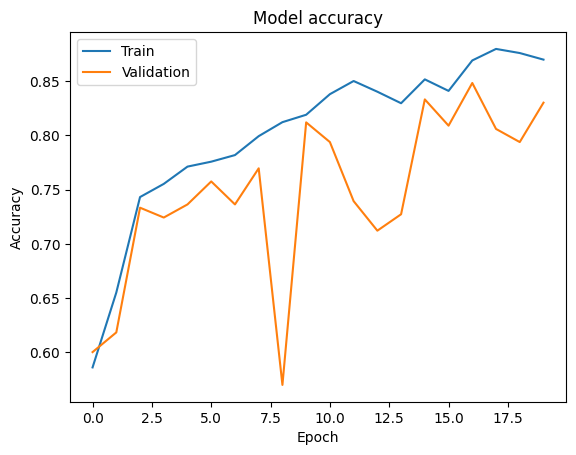

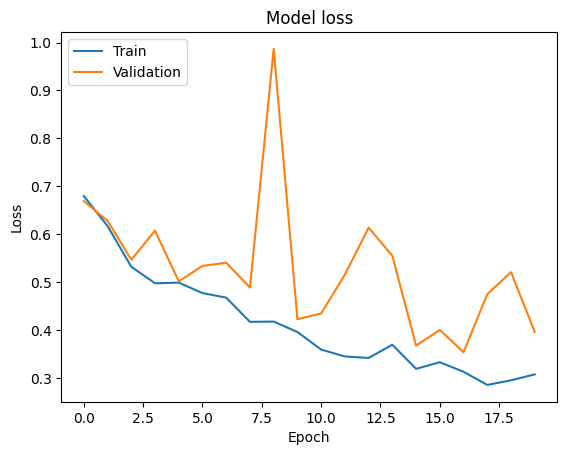

In [139]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       198
           1       0.87      0.68      0.76       132

    accuracy                           0.83       330
   macro avg       0.84      0.81      0.82       330
weighted avg       0.83      0.83      0.83       330



<Figure size 2000x3000 with 0 Axes>

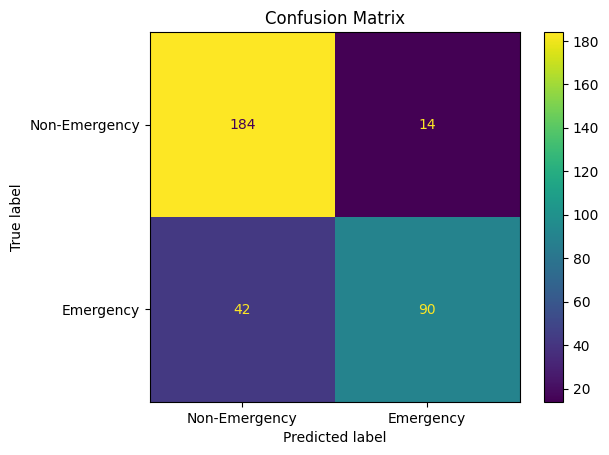

In [140]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [141]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)                   │ (None, 112, 112, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 56, 56, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 432,257 (1.65 MB)

 Trainable params: 431,809 (1.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [142]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=128),  # with Batch size = 128
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.5431 - loss: 0.7323 - val_accuracy: 0.5939 - val_loss: 0.6881
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.5509 - loss: 0.7180 - val_accuracy: 0.5970 - val_loss: 0.6825
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.5986 - loss: 0.6764 - val_accuracy: 0.5818 - val_loss: 0.6817
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.5682 - loss: 0.7001 - val_accuracy: 0.5939 - val_loss: 0.6809
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.5813 - loss: 0.6970 - val_accuracy: 0.6091 - val_loss: 0.6763
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.5470 - loss: 0.6970 - val_accuracy: 0.6212 - val_loss: 0.6714
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.5755 - loss: 0.6849 - val_accuracy: 0.6242 - val_loss: 0.6668
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.5531 - loss: 0.6961 - val_accuracy: 0.6182 - val_

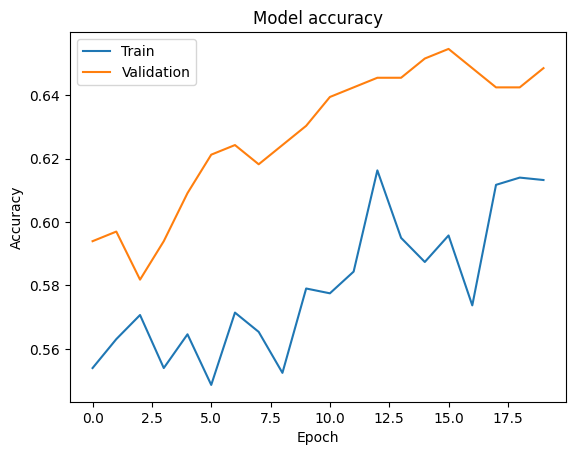

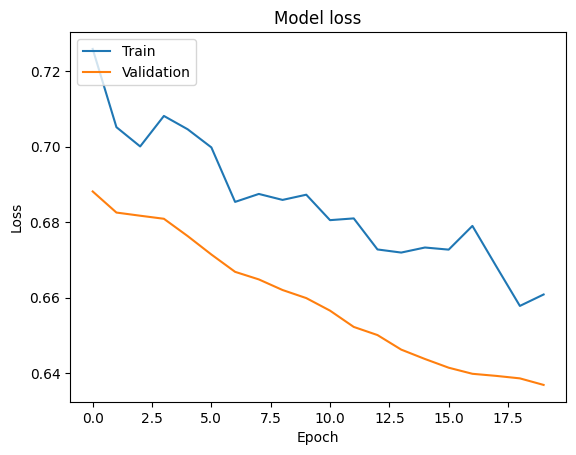

In [143]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       198
           1       0.65      0.27      0.38       132

    accuracy                           0.65       330
   macro avg       0.65      0.58      0.57       330
weighted avg       0.65      0.65      0.60       330



<Figure size 2000x3000 with 0 Axes>

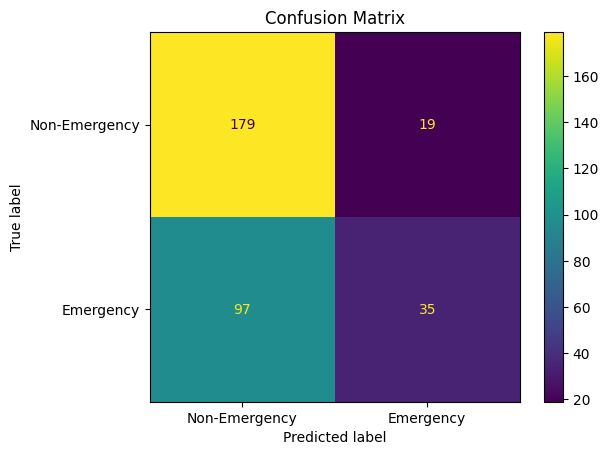

In [144]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [145]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()


# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=128),  # with Batch size = 128
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)                   │ (None, 112, 112, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 56, 56, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 432,257 (1.65 MB)

 Trainable params: 431,809 (1.65 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 244ms/step - accuracy: 0.6158 - loss: 0.6598 - val_accuracy: 0.6000 - val_loss: 0.6858
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.7394 - loss: 0.5295 - val_accuracy: 0.6030 - val_loss: 0.7355
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.7654 - loss: 0.4899 - val_accuracy: 0.7212 - val_loss: 0.5894
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.7899 - loss: 0.4718 - val_accuracy: 0.7061 - val_loss: 0.6071
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.8019 - loss: 0.4199 - val_accuracy: 0.7909 - val_loss: 0.4167
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8055 - loss: 0.4164 - val_accuracy: 0.8121 - val_loss: 0.3994
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.8592 - loss: 0.3617 - val_accuracy: 0.7697 - val_loss: 0.5425
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.8365 - loss: 0.3655 - val_accuracy: 0.8061 - val_

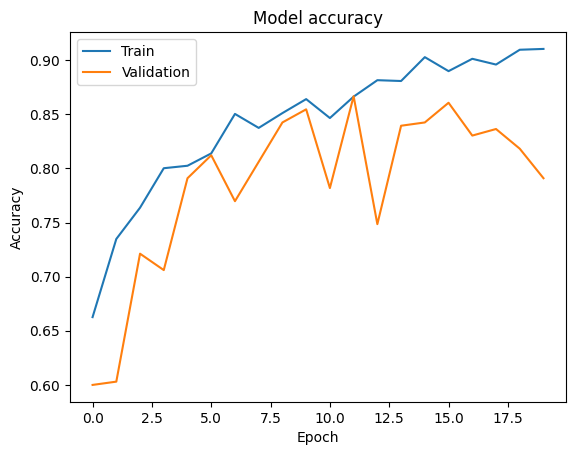

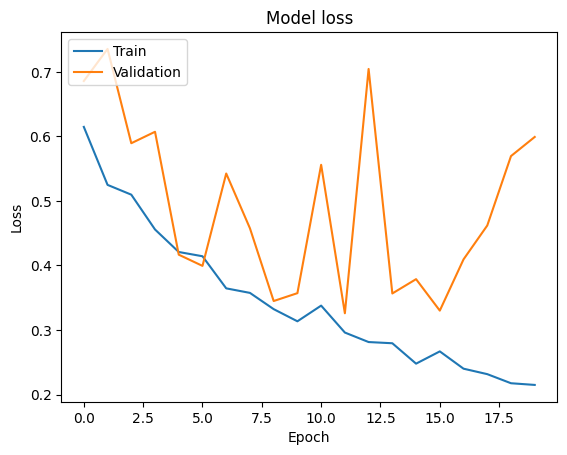

In [146]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       198
           1       0.91      0.53      0.67       132

    accuracy                           0.79       330
   macro avg       0.83      0.75      0.76       330
weighted avg       0.82      0.79      0.78       330



<Figure size 2000x3000 with 0 Axes>

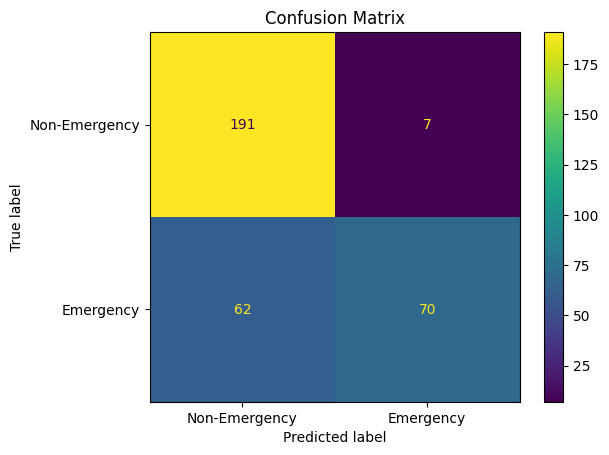

In [147]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

# best model

In [148]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()


# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=64),  # with Batch size = 64
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 112, 112, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 56, 56, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 28, 28, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,721 (1.49 MB)

 Trainable params: 390,273 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.5901 - loss: 0.9611 - val_accuracy: 0.6000 - val_loss: 0.7862
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.7240 - loss: 0.5693 - val_accuracy: 0.6939 - val_loss: 0.6031
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.7345 - loss: 0.5349 - val_accuracy: 0.7515 - val_loss: 0.4981
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.7664 - loss: 0.4790 - val_accuracy: 0.7727 - val_loss: 0.4550
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.7804 - loss: 0.4675 - val_accuracy: 0.7242 - val_loss: 0.5383
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.8263 - loss: 0.3976 - val_accuracy: 0.8061 - val_loss: 0.4024
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8290 - loss: 0.3916 - val_accuracy: 0.8152 - val_loss: 0.4296
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.8191 - loss: 0.3888 - val_accuracy: 0.7939 - val_

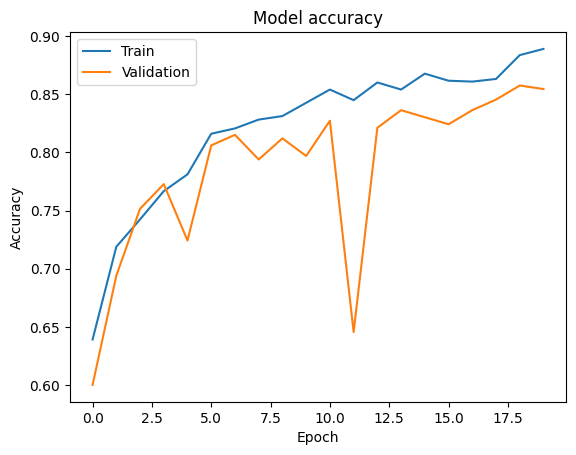

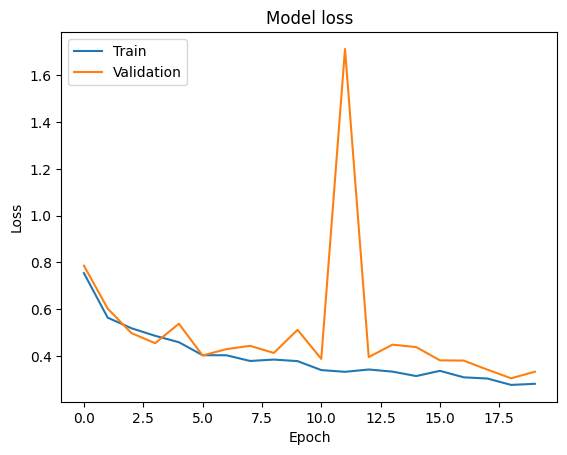

In [149]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       198
           1       0.86      0.77      0.81       132

    accuracy                           0.85       330
   macro avg       0.85      0.84      0.85       330
weighted avg       0.85      0.85      0.85       330



<Figure size 2000x3000 with 0 Axes>

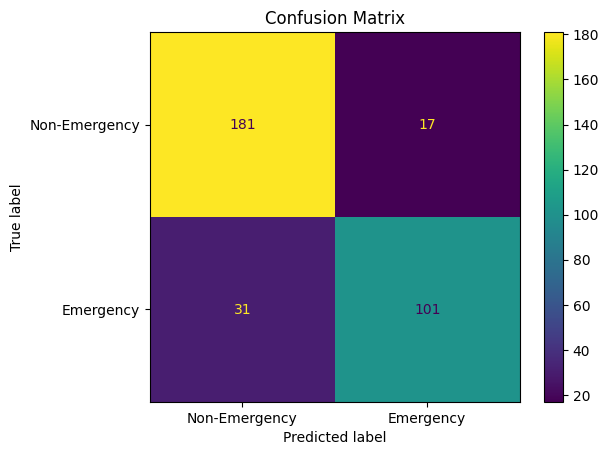

In [150]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [151]:
# Define the CNN model
model = Sequential([
    keras.Input(shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', strides=(2,2), padding='same'),
    MaxPooling2D(pool_size=(2,2), padding='same'),
    BatchNormalization(momentum=0.9),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (emergency or not)
])

# Display model summary
model.summary()


# Split training data into train and validation sets (80% train, 20% validation)
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Use the augmented data and train the model with Batch size = 64
history = model.fit(
    train_datagen.flow(x_train_split, y_train_split, batch_size=64),  # with Batch size = 64
    epochs=20,
    validation_data=(x_val_split, y_val_split)
)



Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)                   │ (None, 112, 112, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 56, 56, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,345 (880.25 KB)

 Trainable params: 224,897 (878.50 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.6223 - loss: 0.7689 - val_accuracy: 0.6576 - val_loss: 0.6404
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.7329 - loss: 0.5477 - val_accuracy: 0.7364 - val_loss: 0.5513
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.7301 - loss: 0.5385 - val_accuracy: 0.7545 - val_loss: 0.5270
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.7984 - loss: 0.4601 - val_accuracy: 0.7879 - val_loss: 0.4875
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.8005 - loss: 0.4381 - val_accuracy: 0.8061 - val_loss: 0.4701
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.8415 - loss: 0.4032 - val_accuracy: 0.7667 - val_loss: 0.5911
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.8224 - loss: 0.4079 - val_accuracy: 0.7242 - val_loss: 0.7597
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.8053 - loss: 0.4167 - val_accuracy: 0.7364 - val_

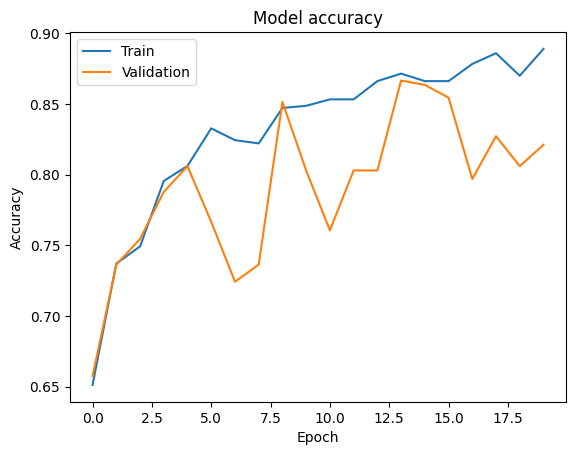

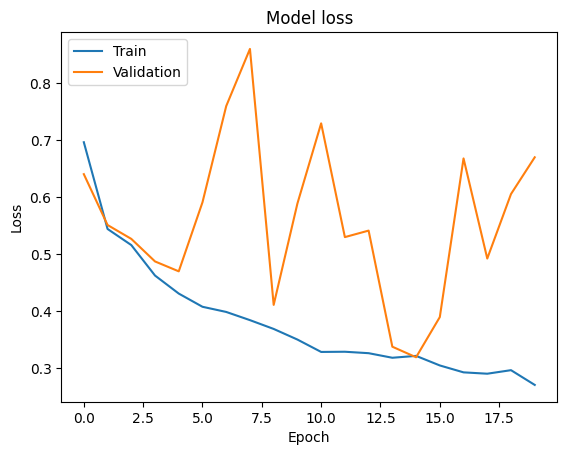

In [152]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       198
           1       0.99      0.56      0.71       132

    accuracy                           0.82       330
   macro avg       0.88      0.78      0.79       330
weighted avg       0.86      0.82      0.81       330



<Figure size 2000x3000 with 0 Axes>

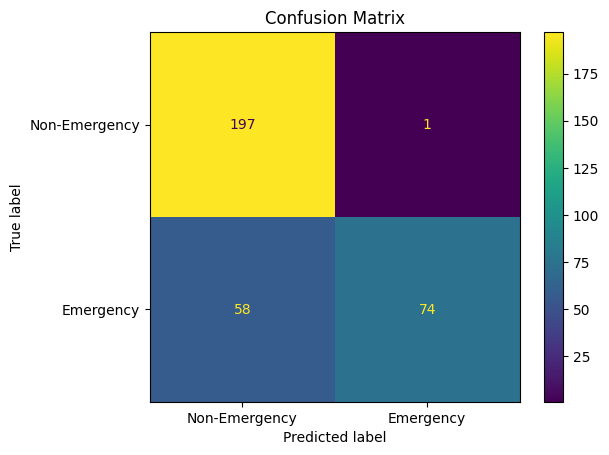

In [153]:
# Evaluate the model on the validation set
y_val_pred = model.predict(x_val_split)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_val_split, y_val_pred_binary))

# Compute the confusion matrix
class_names = ['Non-Emergency', 'Emergency']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val_split, y_val_pred_binary, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()